In [6]:
#import libraries
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
print('done')

done


In [7]:
#upload dataset
df = pd.read_csv('adults.csv')
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
              'relationship','race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 
              'native-country', 'salary']
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
# split salary
X = df.drop(['salary'], axis = 1)
y = df['salary']

In [9]:
X.select_dtypes(include = 'object').tail(25)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
32536,Private,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Female,United-States
32537,Private,HS-grad,Never-married,Craft-repair,Not-in-family,Black,Male,United-States
32538,Private,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,United-States
32539,?,Doctorate,Married-civ-spouse,?,Husband,White,Male,United-States
32540,State-gov,HS-grad,Separated,Adm-clerical,Own-child,White,Female,United-States
32541,?,HS-grad,Separated,?,Not-in-family,Black,Female,United-States
32542,?,HS-grad,Married-civ-spouse,?,Husband,White,Male,United-States
32543,Local-gov,Assoc-acdm,Divorced,Prof-specialty,Unmarried,White,Female,United-States
32544,Private,Masters,Divorced,Other-service,Not-in-family,Other,Female,United-States
32545,Local-gov,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,United-States


In [10]:
# modifying the missing data
categorical_columns = [c for c in X.columns  if X[c].dtype.name == 'object']
for c in categorical_columns:
  X[c] = np.where(X[c] == ' ?', X[c].mode(), df[c])

In [11]:
#encoding
X = pd.concat([X, pd.get_dummies(X.select_dtypes(include='object'))], axis=1)
X = X.drop(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'], axis=1)
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# build the model
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size = 0.3, random_state = 3)

In [13]:
print(X_trainset.shape)
print(X_testset.shape)

(22792, 105)
(9769, 105)


In [14]:
adultTree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
adultTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
adultTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
# prediction
predTree = adultTree.predict(X_testset)

In [17]:
print (predTree [-3:])
print (y_testset [-3:])

[' <=50K' ' >50K' ' <=50K']
11979      >50K
23015      >50K
9354      <=50K
Name: salary, dtype: object


In [18]:
#evaluation
from sklearn import metrics
print("Accuracy is ", metrics.accuracy_score(y_testset, predTree))

Accuracy is  0.8410277408127751


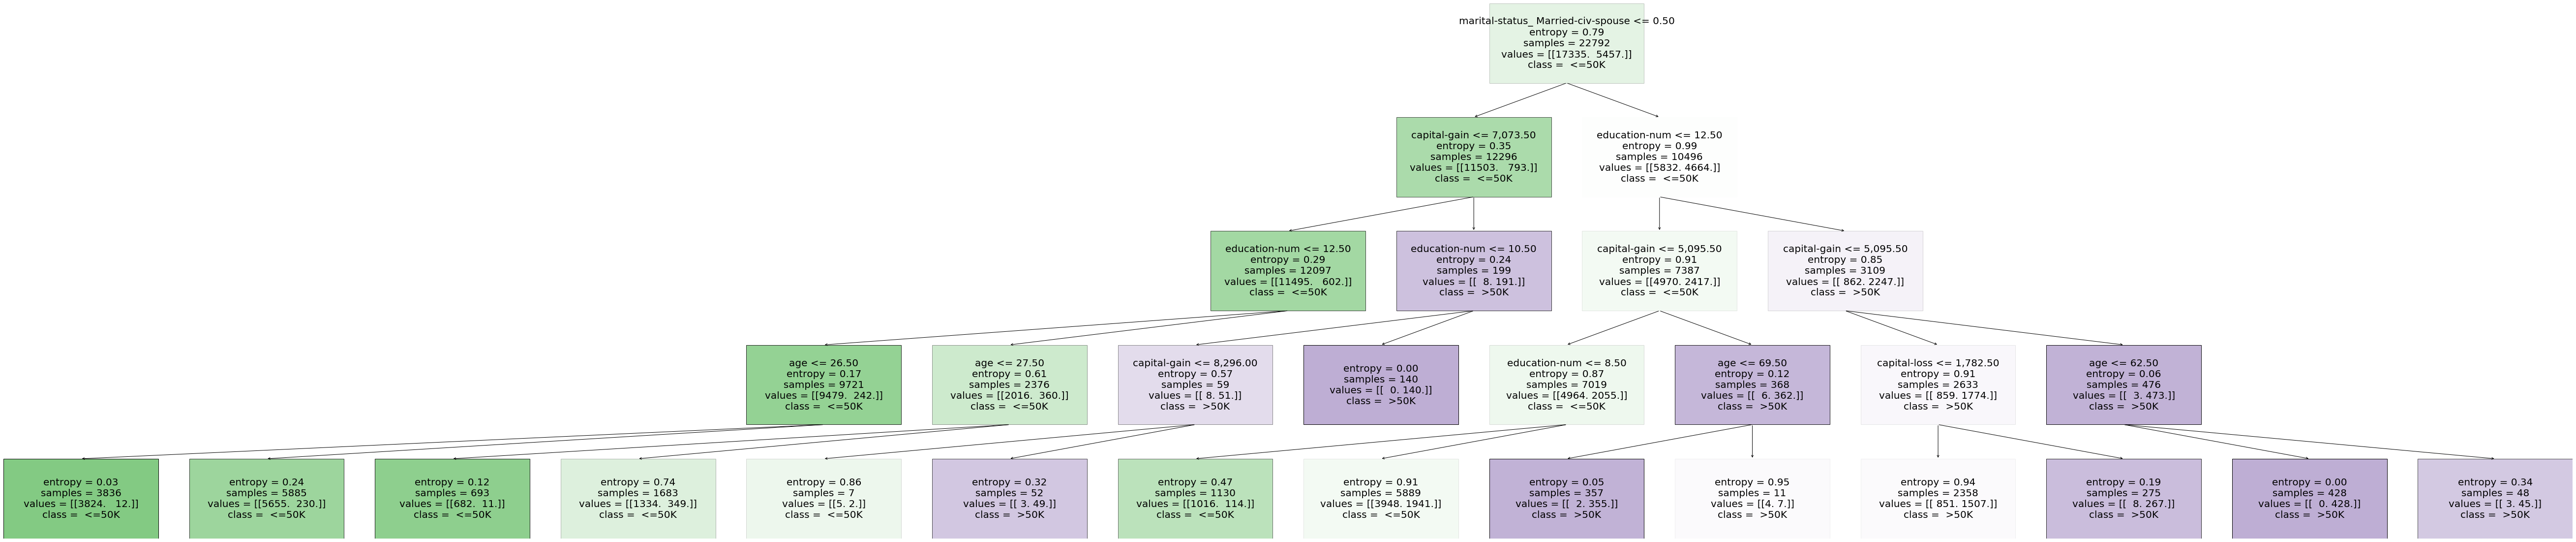

In [21]:
#visualizing
from dtreeplt import dtreeplt
dtree = dtreeplt(
    model=adultTree,
    feature_names=X.columns,
    target_names=np.unique(y_trainset)
)
fig = dtree.view()